C:\Users\Playdata\AppData\Local\Temp\ipykernel_20072\1883193403.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20072\1883193403.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Correlation with 'is_canceled':
is_canceled                       1.000000
reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
reservation_status_date           0.162135
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                 

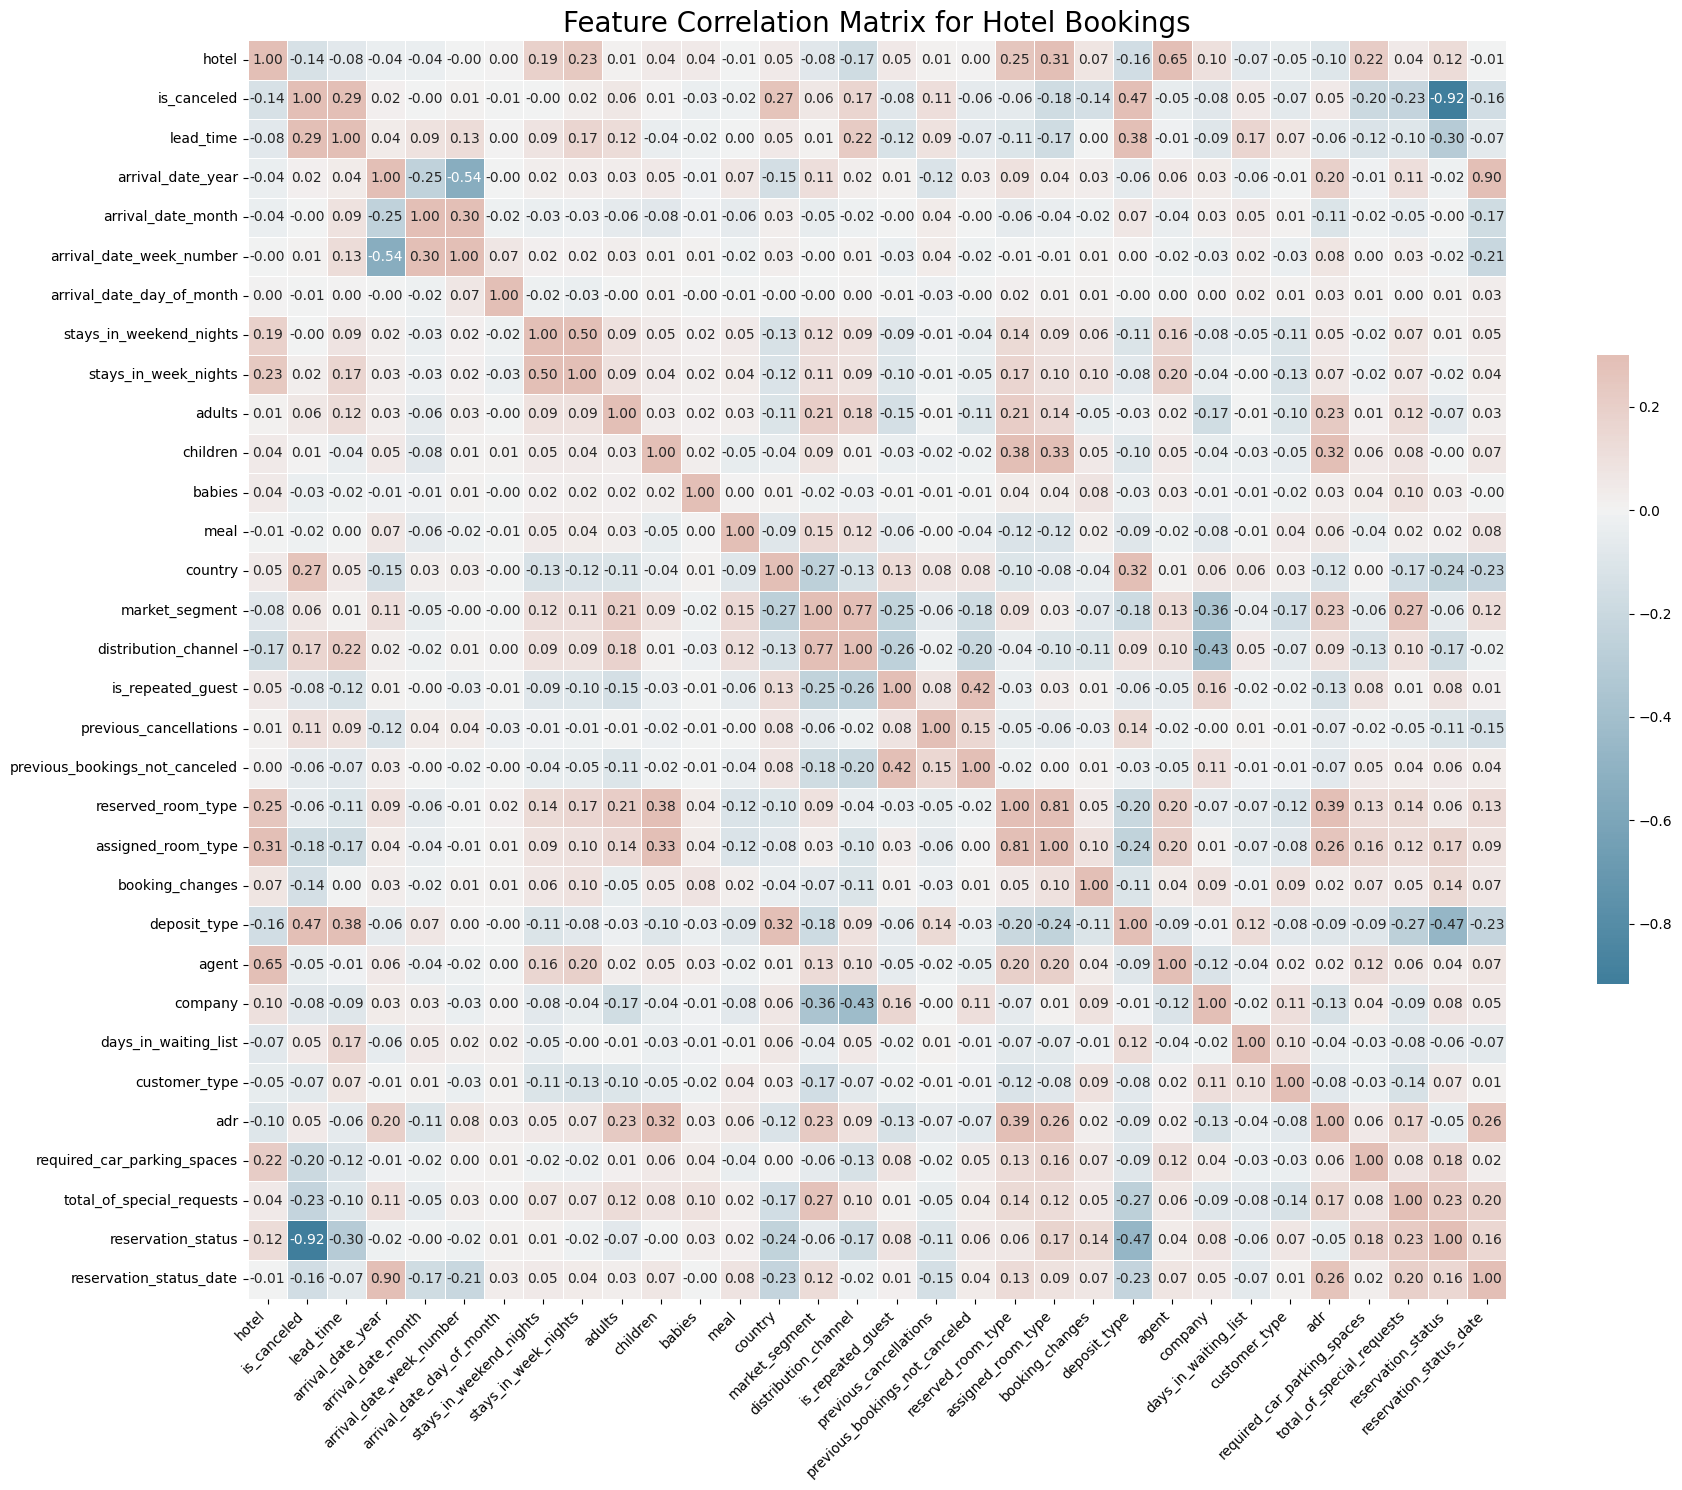

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/hotel_bookings.csv')

# --- Data Preprocessing ---

# Handle missing values
# For 'agent' and 'company', fill missing values with 0 (assuming no agent or company)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# For 'country', fill missing values with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# For 'children', fill missing values with 0
df['children'].fillna(0, inplace=True)

# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# --- Correlation Analysis ---

# Calculate the correlation matrix
corr_matrix = df.corr()

# --- Visualization ---

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Feature Correlation Matrix for Hotel Bookings', size=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('hotel_booking_correlation_heatmap.png')

# Display the correlation of all features with 'is_canceled'
cancellation_corr = corr_matrix['is_canceled'].abs().sort_values(ascending=False)
print("Correlation with 'is_canceled':")
print(cancellation_corr)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20072\2809364031.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20072\2809364031.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

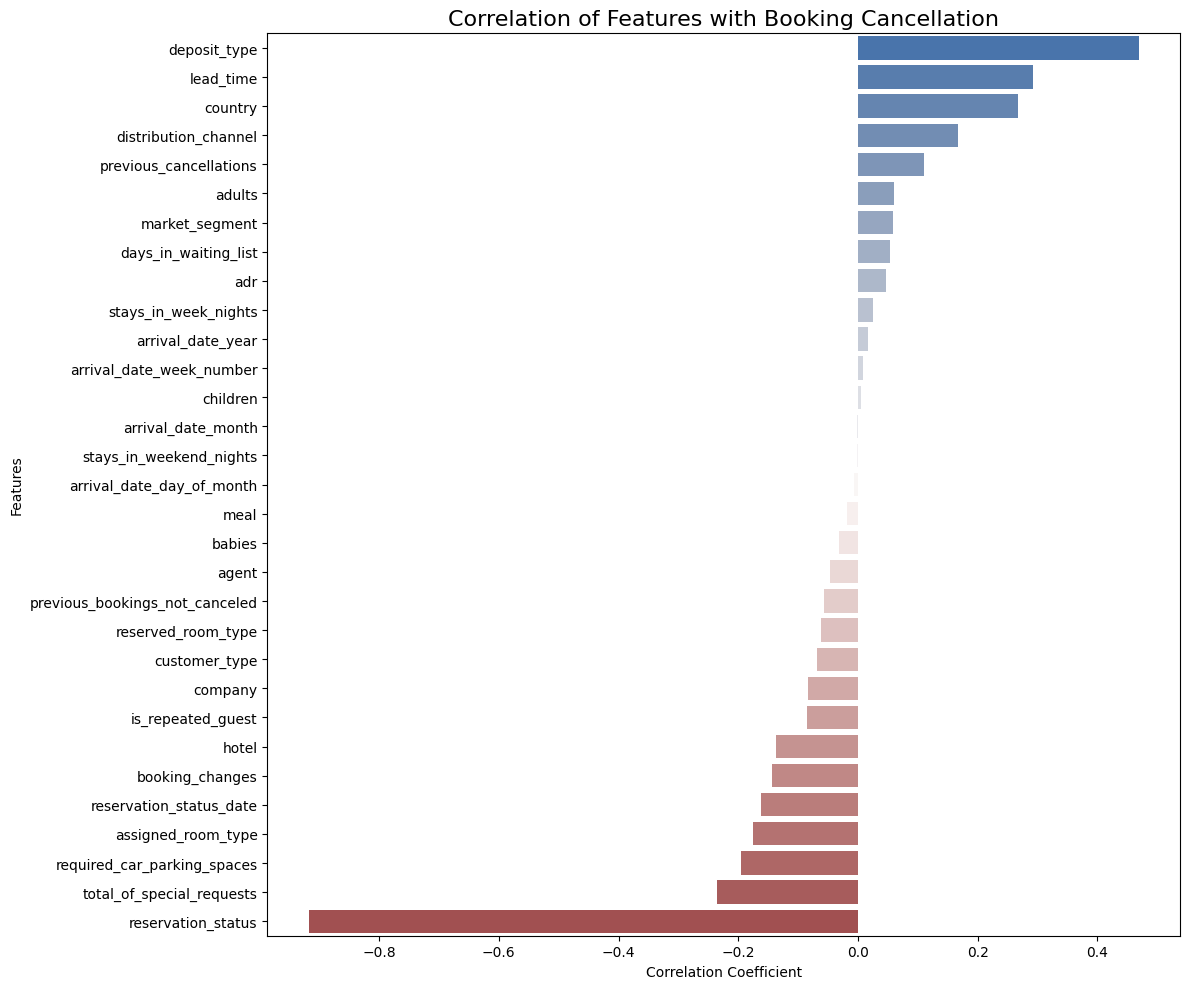

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('data/hotel_bookings.csv')

# --- Data Preprocessing (same as before) ---
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)

categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# --- Correlation Calculation ---
corr_matrix = df.corr()
cancellation_corr = corr_matrix['is_canceled'].drop('is_canceled').sort_values(ascending=False)

# --- Bar Plot Visualization ---
plt.figure(figsize=(12, 10))
sns.barplot(x=cancellation_corr.values, y=cancellation_corr.index, palette='vlag')

plt.title('Correlation of Features with Booking Cancellation', size=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('cancellation_correlation_barplot.png')